# Data Preprocessing

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset into our project using pandas library

dataset = pd.read_csv("data/housing_prices.csv")

In [7]:
# Viewing the first few observations of our dataset using head function

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Dropping Id column from the dataframe since we have an index

dataset.drop("Id", axis = 1, inplace = True)

In [9]:
# Checking all column names

print(dataset.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
# Checking the shape of our dataset to confirm the number of columns and rows

print(dataset.shape) # dataset has 1460 observations and 80 features

(1460, 80)


In [11]:
# Dealing with missing values

# Hypothesis - Dropping columns with more than 15% missing values 

# Viewing columns with any missing value

missing = pd.concat([dataset.isnull().sum(), dataset.isnull().sum() / dataset.shape[0] ], axis=1, keys=['Dataset', 'Percentage'])
print(missing[missing.sum(axis=1) > 0])

              Dataset  Percentage
LotFrontage       259    0.177397
Alley            1369    0.937671
MasVnrType          8    0.005479
MasVnrArea          8    0.005479
BsmtQual           37    0.025342
BsmtCond           37    0.025342
BsmtExposure       38    0.026027
BsmtFinType1       37    0.025342
BsmtFinType2       38    0.026027
Electrical          1    0.000685
FireplaceQu       690    0.472603
GarageType         81    0.055479
GarageYrBlt        81    0.055479
GarageFinish       81    0.055479
GarageQual         81    0.055479
GarageCond         81    0.055479
PoolQC           1453    0.995205
Fence            1179    0.807534
MiscFeature      1406    0.963014


In [12]:
'''''
From the analysis above of missing value, base on our hypothesis of dropping columns with more than
15% missing values, we are going to delete LotFrontage, Alley, FireplaceQu, PoolQC, Fence, MiscFeature  
'''''

dataset.drop(["LotFrontage", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1, inplace = True)

In [13]:
# Viewing columns with any missing value after removing columns with more than 15% missing values

missing = pd.concat([dataset.isnull().sum(), dataset.isnull().sum() / dataset.shape[0] ], axis=1, keys=['Dataset', 'Percentage'])
print(missing[missing.sum(axis=1) > 0])

              Dataset  Percentage
MasVnrType          8    0.005479
MasVnrArea          8    0.005479
BsmtQual           37    0.025342
BsmtCond           37    0.025342
BsmtExposure       38    0.026027
BsmtFinType1       37    0.025342
BsmtFinType2       38    0.026027
Electrical          1    0.000685
GarageType         81    0.055479
GarageYrBlt        81    0.055479
GarageFinish       81    0.055479
GarageQual         81    0.055479
GarageCond         81    0.055479


In [14]:
# Dropping the rows with missing values since they are a small portion of the dataset.

dataset.dropna(inplace=True)

In [15]:
dataset.shape # we lost 122 rows from dropping the na osbervations out of 1460 observations

(1338, 74)

# Exploratory Data Analysis For Feature Selection and Feature Engineering

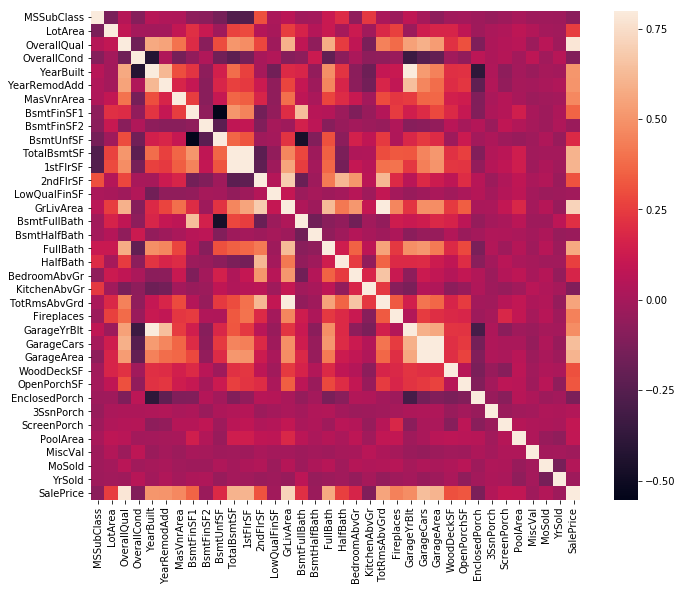

"''\nThe produced correlation coefficient matrix indicate that some variables have a strong positive correlation\nand some variables strong negative correlation. Some variables have no correlation. We will go ahead and \nselect top 10 features with the strongest correlation with each other.\n"

In [16]:
'''''
In our dataset, column SalePrice will be our dependent variable and the other 73 our independent variables.
We need to explore the relationship between the indepedent variable to the dependent variable and between
one independent variable to another independent variable. To achieve this, we will employ the use of 
correlation coefficient matrix
'''''

# making correlation coefficient matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

'''''
The produced correlation coefficient matrix indicate that some variables have a strong positive correlation
and some variables strong negative correlation. Some variables have no correlation. We will go ahead and 
select top 10 features with the strongest correlation with each other.
'''''

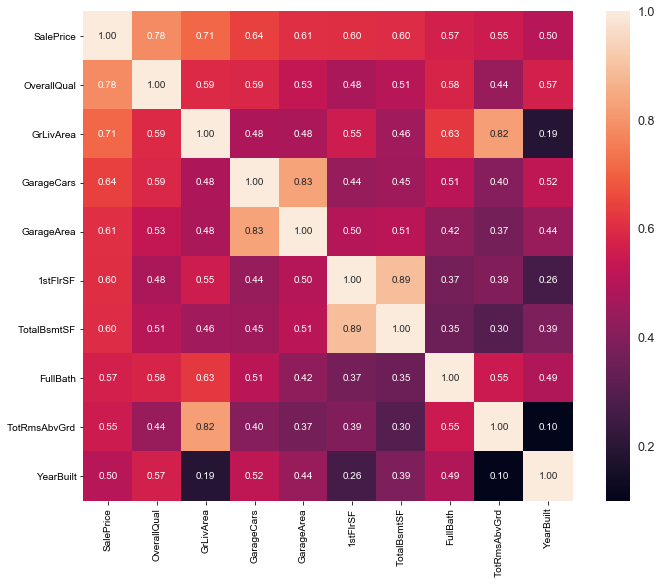

"''\nFrom  this top 10 features with the strongest correlation, since GarageCars and GarageArea have a high correlation with each other, we are going to pick GarageCars \nto represent the relationship between SalePrice and garage since it has a higher score. GarageArea is eliminated.\n\nSince 1stFlrSF and TotalBsmtSF have a high correlation with each other, we are going to eliminate one of them.\nSince they have the same score. We will pick 1stFlrSF.\n\n"

In [17]:
# Top 10 features with the strongest correlation with each other.

cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

'''''
From  this top 10 features with the strongest correlation, since GarageCars and GarageArea have a high correlation with each other, we are going to pick GarageCars 
to represent the relationship between SalePrice and garage since it has a higher score. GarageArea is eliminated.

Since 1stFlrSF and TotalBsmtSF have a high correlation with each other, we are going to eliminate one of them.
Since they have the same score. We will pick 1stFlrSF.

'''''

In [18]:
# New dataset of 8 feature variables and one response variable

dataset = dataset[["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "SalePrice"]]

In [19]:
# Inspecting the  variables for outliers and Normality

dataset.describe()

'''''
Based on the difference between the max value and the 3 quartile, It is clear there are outliers in the 
dependent variable SalePrice, TotalBsmtSF and 1stFlrSF
'''''

"''\nBased on the difference between the max value and the 3 quartile, It is clear there are outliers in the \ndependent variable SalePrice, TotalBsmtSF and 1stFlrSF\n"

In [20]:
# Explanation of feature variables

'''''
OverallQual: Rates the overall material and finish of the house (CATEGORICAL)

       10 - Very Excellent
       9 - Excellent
       8 - Very Good
       7 - Good
       6 - Above Average
       5 - Average
       4 - Below Average
       3 - Fair
       2 - Poor
       1 - Very Poor
    
GrLivArea : Above grade (ground) living area square feet (NUMERICAL)
    
TotalBsmtSF : Total square feet of basement area (NUMERICAL)
 
GarageCars : Size of garage in car capacity (NUMERICAL)

1stFlrSF: First Floor square feet (NUMERICAL)
    
FullBath : Full bathrooms above grade (NUMERICAL)
    
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) (NUMERICAL)
    
YearBuilt : Original construction date 

'''''

"''\nOverallQual: Rates the overall material and finish of the house (CATEGORICAL)\n\n       10 - Very Excellent\n       9 - Excellent\n       8 - Very Good\n       7 - Good\n       6 - Above Average\n       5 - Average\n       4 - Below Average\n       3 - Fair\n       2 - Poor\n       1 - Very Poor\n    \nGrLivArea : Above grade (ground) living area square feet (NUMERICAL)\n    \nTotalBsmtSF : Total square feet of basement area (NUMERICAL)\n \nGarageCars : Size of garage in car capacity (NUMERICAL)\n\n1stFlrSF: First Floor square feet (NUMERICAL)\n    \nFullBath : Full bathrooms above grade (NUMERICAL)\n    \nTotRmsAbvGrd: Total rooms above grade (does not include bathrooms) (NUMERICAL)\n    \nYearBuilt : Original construction date \n\n"

In [21]:
# Feature Engineer age from YearBuilt

dataset.YearBuilt.describe()
dataset["age"] = dataset["YearBuilt"] - 1880 

# subtract the minimum year built from each observation YearBuilt column to convert it to age
# the age feature that has been engineered is (NUMERICAL)

In [22]:
dataset.drop("YearBuilt", axis = 1, inplace = True) # dropping the year built

In [23]:
dataset.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,SalePrice,age
0,7,1710,856,2,856,2,8,208500,123
1,6,1262,1262,2,1262,2,6,181500,96
2,7,1786,920,2,920,2,6,223500,121
3,7,1717,756,3,961,1,7,140000,35
4,8,2198,1145,3,1145,2,9,250000,120


In [24]:
dataset.shape

(1338, 9)

In [25]:
# Standardizing the numerical feature variables

numeric_data = dataset.loc[:, ["GrLivArea", "TotalBsmtSF", "GarageCars", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "age"]]
numeric_data_standardized = (numeric_data - numeric_data.mean())/numeric_data.std()

In [26]:
# Getting Dummies so that we can accomodate the categorical OverallQual variable in our modelling

condition = set([x for x in dataset['OverallQual']])
dummies = pd.DataFrame(data=np.zeros((len(dataset.index), len(condition))), index=dataset.index, columns=condition)
for i, cond in enumerate(zip(dataset['OverallQual'])):
    dummies.ix[i, cond] = 1
dataset = pd.concat([dataset, dummies.add_prefix('OverallQual_')], axis=1)
dataset.drop(['OverallQual'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [27]:
# Replacing numeric feature by standardized values to over dataset

dataset.update(numeric_data_standardized)

In [28]:
dataset.head()

,GrLivArea,TotalBsmtSF,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,SalePrice,age,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,0.331198,-0.591653,0.202671,-0.828207,0.775270,0.914738,208500.0,1.013778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.529381,0.409445,0.202671,0.221852,0.775270,-0.347035,181500.0,0.100490,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.477189,-0.433845,0.202671,-0.662680,0.775270,-0.347035,223500.0,0.946127,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.344644,-0.838229,1.779263,-0.556640,-1.050982,0.283852,140000.0,-1.962862,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.268614,0.120951,1.779263,-0.080751,0.775270,1.545625,250000.0,0.912301,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Dropping any missing value that was introduced to our dataset due to standardization

dataset.dropna(inplace=True)

In [30]:
# Specifying Features variable in this project`

X = dataset.drop("SalePrice", axis = 1)

In [31]:
X.shape

(1338, 16)

In [32]:
# Specifying dependent variable in this project

y = dataset["SalePrice"]

# Split our dataset to Training set and Testing set for Cross Validation and Model Evaluation

In [33]:
# Splitting the Dataset into the Training set and Test set for cross validation later in the project

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

'''
We have used 20% of totals observation as test data and 80% of the total obervation as Test data.
We have also used a random state of 0 to ensure we get the same result when we run the splitting
over and over again.
'''

'\nWe have used 20% of totals observation as test data and 80% of the total obervation as Test data.\nWe have also used a random state of 0 to ensure we get the same result when we run the splitting\nover and over again.\n'

# Building Multiple Linear Regression Model and performing Prediction of the house prices

In [34]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
y_pred.astype(int)

array([230720, 100766, 149507, 192870, 194783, 220524, 193993, 242988,
       119269, 186139, 176332, 168693,  61990, 212232, 204847, 130299,
       199292, 259225, 151563, 129214, 198999, 131595, 178316, 222850,
       187716, 353161, 241869, 126095, 182238, 309781, 213980, 202725,
       212828, 269022, 217429, 232189, 116087, 302955, 246257,  86416,
       247260, 369873, 116343, 353973, 115858,  91139, 204584, 194785,
       165284, 131025, 238392, 242744, 186830, 309594, 232791,  96602,
       184467, 146419, 129854, 159945, 123628, 154882, 138933, 211727,
       221961, 196436, 158437, 246391, 197827,  99915, 227670, 179671,
       144879, 165550, 131900, 229142, 119468, 116628, 283503, 197436,
       185241, 180069, 312571, 138131, 203371, 236586, 170364, 184717,
       231044, 293582, 150935, 287161, 223183, 324603, 119537, 134467,
       274701, 277346, 235727, 147275, 141004, 269337, 119537, 217302,
       281558,  73269, 251835, 185861, 226265, 249570, 213121, 142148,
      

In [36]:
y_test.head() # Compare with the real y_test

631     209500.0
669     137500.0
622     135000.0
1130    135000.0
219     167240.0
Name: SalePrice, dtype: float64

In [37]:
# print the coefficients

print(list(zip(X_train.columns, regressor.coef_)))

'''
Interpretation of the coefficients?

Keeping other variables Constant,  'FullBath' is associated with an average decrease in SalePrice.

Keeping other variables Constant,  'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'TotRmsAbvGrd', age, 
'OverallQual_2'is associated with an average decrease in SalePrice.
'''

[('GrLivArea', 40216.81351777591), ('TotalBsmtSF', 10864.81332412291), ('GarageCars', 16823.54985661529), ('1stFlrSF', 5262.276085747533), ('FullBath', -2591.825419076236), ('TotRmsAbvGrd', -353.44141346390506), ('age', 19274.166846664553), ('OverallQual_2', 16541.414147143856), ('OverallQual_3', -12150.813311946107), ('OverallQual_4', 8130.788393561831), ('OverallQual_5', 6494.563003659011), ('OverallQual_6', 6001.407544631271), ('OverallQual_7', 888.5691908708188), ('OverallQual_8', 9240.70823824348), ('OverallQual_9', 4202.899792113351), ('OverallQual_10', 4893.767101319534)]


"\nInterpretation of the coefficients?\n\nKeeping other variables Constant,  'FullBath' is associated with an average decrease in SalePrice.\n\nKeeping other variables Constant,  'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'TotRmsAbvGrd', age, \n'OverallQual_2'is associated with an average decrease in SalePrice.\n"

# Evaluating our Multiple Linear Regression model

In [38]:
#  R squared based on the training set

from sklearn import metrics
print(regressor.score(X_train, y_train))

'''
In Multiple Regression Model, 71.71% of the variability in the training set data can be explained using 
the training set.
'''

0.7171412911471307


'\nIn Multiple Regression Model, 71.71% of the variability in the training set data can be explained using \nthe training set.\n'

In [39]:
#  R squared based on the test set

from sklearn import metrics
print(regressor.score(X_test, y_test))

'''
In Multiple Regression Model, 65.88% of the variability in the training set data can be explained using 
the training set. The is a drop and does not perform so well in predicting unseen data.
'''

0.658896960186558


'\nIn Multiple Regression Model, 65.88% of the variability in the training set data can be explained using \nthe training set. The is a drop and does not perform so well in predicting unseen data.\n'

In [40]:
# Calculating root-mean-square error (RMSE) base on the test set

import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

'''
Our Regression model is able to predict the value of every house SalePrice in the test set within 
$41577 of the real price.
'''

41576.97447753317


'\nOur Regression model is able to predict the value of every house SalePrice in the test set within \n$41577 of the real price.\n'

In [41]:
# MAE based on the test set
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

26390.637556730722

# Building Random Forest Regression Model and performing Prediction of the house prices

In [42]:
# Fitting Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
# Predicting the Test set results

y_pred = forest_reg.predict(X_test)
y_pred.astype(int)

array([250340, 132985, 155016, 238150, 196200, 185970, 219260, 237200,
       110190, 173950, 151803, 154640, 114800, 163840, 201042, 117300,
       161260, 242565, 141440, 123300, 215200, 111200, 166500, 213030,
       207930, 421089, 235117, 122500, 161833, 347055, 185650, 183150,
       206369, 254545, 208100, 216483, 128530, 324706, 222963, 119800,
       248573, 481208, 134540, 415089, 117390, 115590, 203226, 187445,
       137750, 121500, 261840, 259990, 166865, 265300, 254820, 116937,
       169750, 147160, 122597, 145540, 120750, 152525, 132200, 185208,
       214530, 197300, 129500, 260480, 178550,  99990, 168050, 146700,
       136900, 157113, 126650, 209047, 127075, 113790, 300192, 173650,
       163280, 167630, 282300, 142120, 208416, 229440, 150510, 163615,
       245450, 318542, 143817, 238197, 220130, 299661, 127400, 135300,
       263172, 279668, 221390, 148600, 143610, 271797, 134100, 188600,
       270146, 108600, 161827, 174350, 226800, 234940, 193588, 148200,
      

In [44]:
y_test.head() # Compare with the real y_test

631     209500.0
669     137500.0
622     135000.0
1130    135000.0
219     167240.0
Name: SalePrice, dtype: float64

# Evaluating our Random Forest Regression model

In [45]:
#  R squared based on the training set

from sklearn import metrics
print(forest_reg.score(X_train, y_train))

'''
In Random Forest Regression Model, 96.44% of the variability in the training set data can be explained using 
the training set.
'''

0.9644813758404256


'\nIn Random Forest Regression Model, 96.44% of the variability in the training set data can be explained using \nthe training set.\n'

In [46]:
#  R squared based on the test set

from sklearn import metrics
print(forest_reg.score(X_test, y_test))

'''
In Random Forest Regression Model, 64.68% of the variability in the training set data can be explained using 
the training set. The is a drop and does not perform so well in predicting unseen data.
'''

0.6468093007186306


'\nIn Random Forest Regression Model, 64.68% of the variability in the training set data can be explained using \nthe training set. The is a drop and does not perform so well in predicting unseen data.\n'

In [47]:
# Calculating root-mean-square error (RMSE) base on the test set

import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, forest_reg.predict(X_test))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

'''
Our Random Forest Regression model is able to predict the value of every house SalePrice in the test set within 
$42307 of the real price.
'''

42307.24225642468


'\nOur Random Forest Regression model is able to predict the value of every house SalePrice in the test set within \n$42307 of the real price.\n'

In [48]:
# MAE based on the test set
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, forest_reg.predict(X_test))

22767.721641791046

In [49]:
'''
Based on the model evaluation of multiple linear regression model and Random Forest regression model,
It is clear that Random Forest Regression Model is the winner and is able to predict the price of every
house with a minimum price range based on the Minimum Absolute Error. 
'''

'\nBased on the model evaluation of multiple linear regression model and Random Forest regression model,\nIt is clear that Random Forest Regression Model is the winner and is able to predict the price of every\nhouse with a minimum price range based on the Minimum Absolute Error. \n'